In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [5]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')])
    if model_number == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64, (3,3), activation = 'relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')])
    if model_number == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64, (3,3), activation = 'relu'),
            keras.layers.Conv2D(64, (3,3), activation = 'relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(128, (3,3), activation = 'relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')])
    return model

In [6]:
model = select_model(2)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3926 - accuracy: 0.9442
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0701 - accuracy: 0.9796
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0581 - accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0412 - accuracy: 0.9876


In [10]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy : ', accuracy)

313/313 - 1s - loss: 0.0535 - accuracy: 0.9855

Test loss :  0.05345673859119415
Test accuracy :  0.9854999780654907


In [12]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = (0,1,2,3,4,5,6,7,8,9)

In [13]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                  100*np.max(predictions_array),
                                  Number[true_label]),
                                  color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [22]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

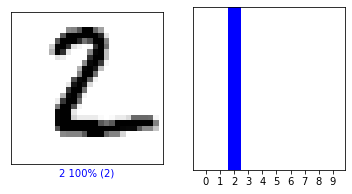

In [23]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

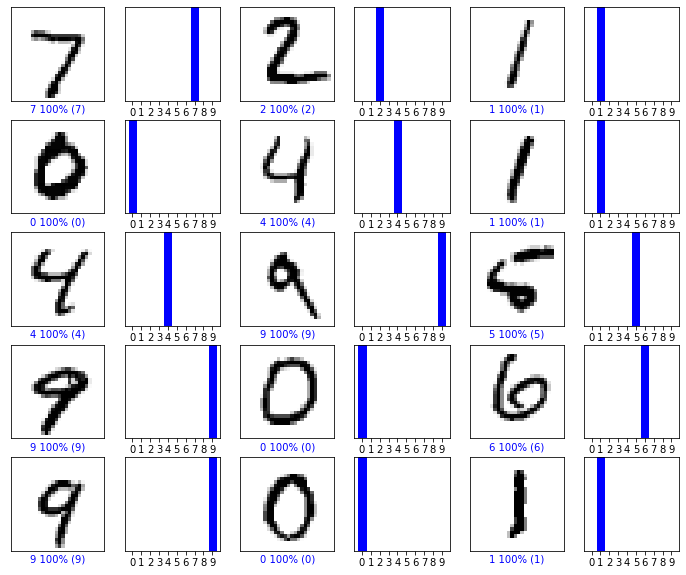

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [25]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [26]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[18, 115, 321, 445, 449, 450, 583, 625, 646, 659]


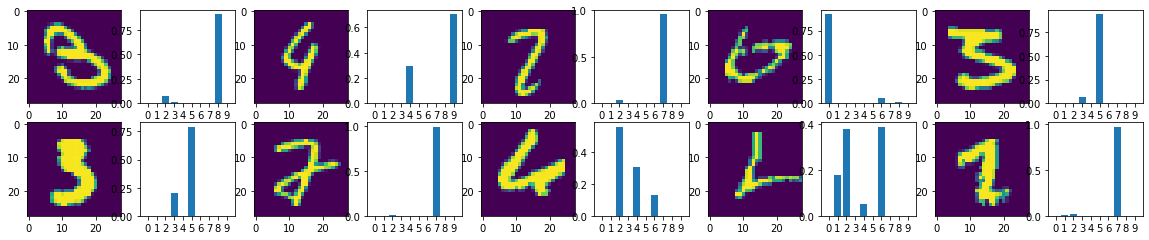

In [27]:
plot_error(index_slice, pred, test_labels)